In [18]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import patsy
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Additional libs
from scipy.stats import norm
from IPython.display import display, Markdown, Latex
import scipy.stats
import sklearn.linear_model
import sklearn.discriminant_analysis
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.neighbors
from sklearn import svm, metrics
import sklearn.tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# from sklearn.discriminant_analysi

Name: Chi Huynh

Kaggle Username: cthuynh: https://www.kaggle.com/cthuynh 

https://www.kaggle.com/c/otto-group-product-classification-challenge/submissions

Project: Otto Group Product Classification Challenge

Github: https://github.com/chithihuynh/ottoFinalProject

# Data Cleaning

In [19]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

- Original Data columns: I will drop the "id" column since it is just counting each data which is already done by pd. 

In [21]:
print("train columns:",train.columns)

train columns: Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81',

In [22]:
print("test columns:",test.columns)

test columns: Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 

In [23]:
# DROP: id - no need 
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

- Change column types for 'target' column of the training data. This is the outcome column which was entered as a 'category' dtype. Therefore, the target column will be change into a 'cat code' which is an 'int 8' type for evaluation. Features will be changed from a int64 to float64 to allow decimals during the evaluation of the data. 

In [28]:
train.dtypes

feat_1        int64
feat_2        int64
feat_3        int64
feat_4        int64
feat_5        int64
             ...   
feat_90       int64
feat_91       int64
feat_92       int64
feat_93       int64
target     category
Length: 94, dtype: object

In [42]:
# Change to float and cat for eval
train.target = pd.Categorical(train.target)
yTrain = train.target.cat.codes

xTrain = train.values[:,:-1].astype('float')
xTest = test.values.astype('float')

In [44]:
print("yTrain type:", yTrain.dtypes)
print("xTrain (each cell) type:",(type( xTrain[0,0])))

yTrain type: int8
xTrain (each cell) type: <class 'numpy.float64'>


# Exploratory Data Analysis (EDA)


## Histogram of Target in Training Data

Let's look at a histogram of the target data in the training set to see how the outcomes turns out. 
There seems to be alot of variation between each class.

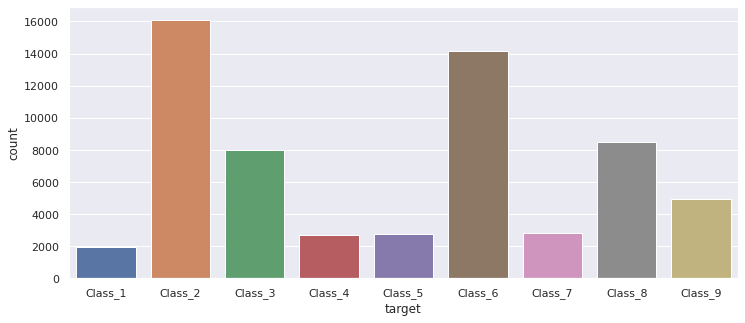

In [46]:
plt.figure(figsize=(12,5))
sns.countplot(train['target']);
# sns.

A look at the KDE over the histogram to see the differences also.

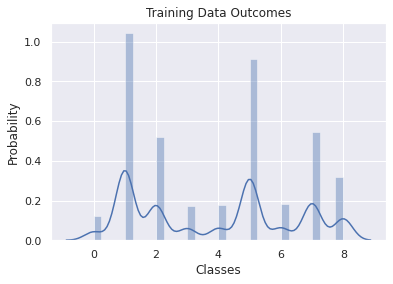

In [27]:
# Pairplots
# sns.pairplot(data=train, hue='target',)
sns.distplot(yTrain)
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.title("Training Data Outcomes");


In [45]:
# # TODO REMOVE?
# plt.scatter(xTrain[:,0], xTrain[:,1], c=yTrain, edgecolors='k')
# plt.show()
# plt.scatter(xTest[:,0], xTest[:,1], edgecolors='k')
# plt.show()

## Scaling
- From the histograms, I decided that scaling is needed since outliners can occur.
- Especially needed for KNN data since KNN uses distance meteric to determine the "nearest neigh", the standard scaling will not be robust due to the outliers. There are alot of outliers: 

In [52]:
print('Train is', xTrain.shape, 'test is', xTest.shape)

Train is (61878, 93) test is (144368, 93)


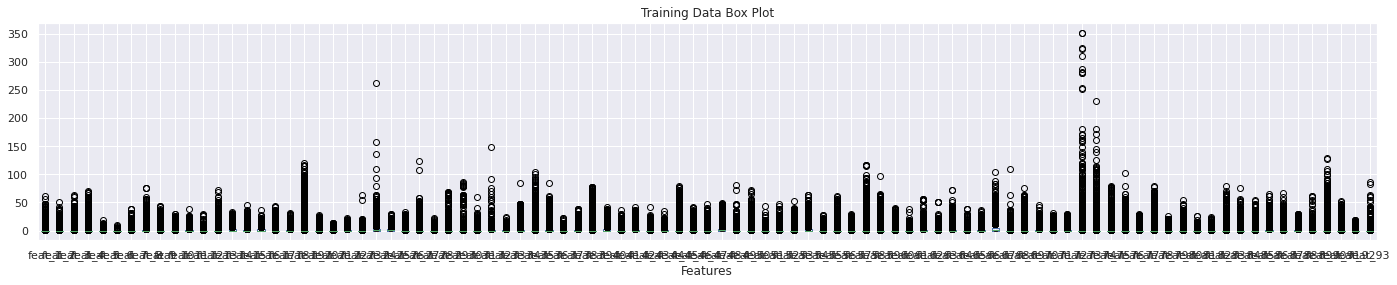

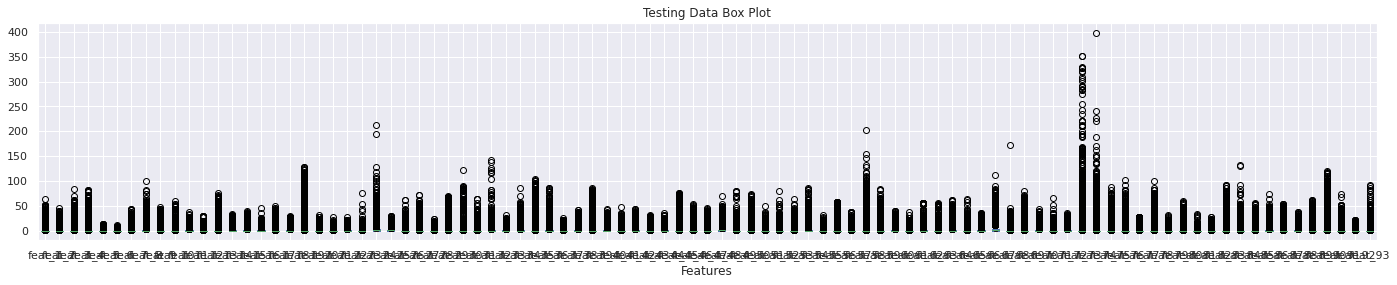

In [55]:
# Outliers need scaling for KNN
train.plot.box(figsize=(24,4))
plt.title('Training Data Box Plot')
plt.xlabel('Features')
plt.show()
test.plot.box(figsize=(24,4))
plt.title('Testing Data Box Plot')
plt.xlabel('Features')
plt.show()

In [50]:
# Scaling train data
def scaleData(data, verbose=False):
    if verbose:
        display("Scaled From:", data, data.shape)
    data = sklearn.preprocessing.scale(data, axis=0)
    if verbose:
        display("Scaled To:", data, data.shape)
    return data


#### Why is scaling needed?

- When scaling the data, we still keep the distribution of the values but transform it in such a way that the mean is 0 with an ideal variance of 1. 

Text(0.5, 1.0, 'Mean of 0 after scaling')

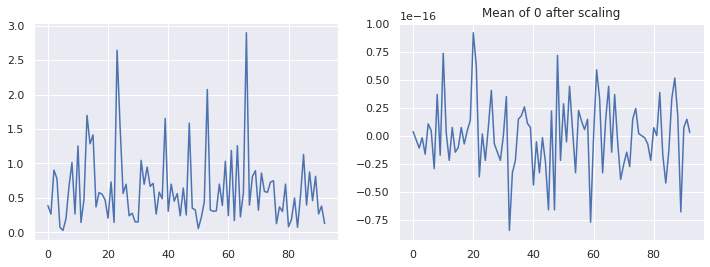

In [68]:
# Scaling the data still keeps the distribu bit the values has
# transform such thathe mean is 0 and ideally the varaicne is 1
scale_Xtrain = scaleData(xTrain)

# Mean
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].plot(np.mean(xTrain, axis=0))
plt.title('No Scaling')
ax[1].plot(np.mean(scale_Xtrain, axis=0));
plt.title('Mean of 0 after scaling')


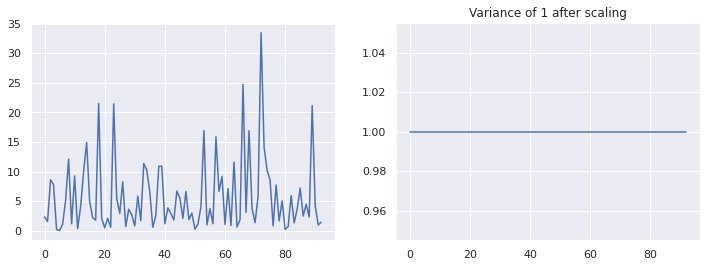

In [70]:
# var num to 1
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].plot(np.var(xTrain, axis=0))
ax[1].plot(np.var(scale_Xtrain, axis=0))
plt.title('Variance of 1 after scaling');

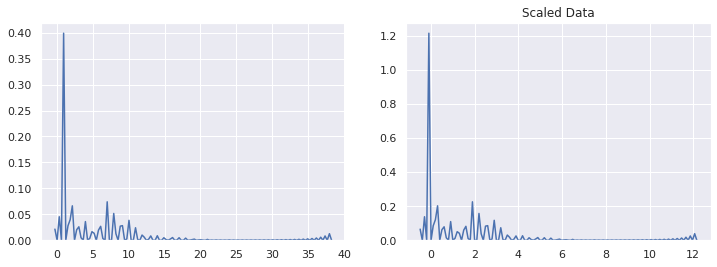

In [71]:
col=10
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.kdeplot(xTrain[:,col], ax=ax[0])
ax[1].set_title('Original Data');
sns.kdeplot(scale_Xtrain[:,col], ax=ax[1])
ax[1].set_title('Scaled Data');

# Model


Several classification methods will be use to train the data. The classification with the highest accurancy score will be use to run on the given test data set provided by Otto (test.csv). 
- The training set will split into 0.3 part testing and the rest is the training set. 
- KDE with a histogram will show the outcome of each classification. 
- Confusion matrix for each will also be shown.

In [47]:
# Helper function to get max predicted prob class
def getPredictProbaDistrib(predicted_proba):
    ys = []
    for i in range(len(predicted_proba)):
        y = np.argmax(predicted_proba[i])
        ys.append(y)
    return ys        


In [110]:

def runClassifers(models,modelNames, dataset, test_size, test=[]):
    # Get data set and scale it
    X, y = dataset
    X = scaleData(X)[:,]

    # Split of training and testing data 
    xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(X, y, random_state=0, test_size=test_size)
    if len(test) != 0:
        test = scaleData(test)[:,]
        xTrain = X
        xTest = test

        yTrain = y
        yTest = []
    accuracy_scores = []
    cms = []
    result = []
    
    # for each model
    for i in range(len(models)):
        print("\n-------------------")
        print(modelNames[i])
        print("-------------------")
    

        # Fit and Predict
        model = %time models[i].fit(xTrain, yTrain)
        yhat = %time model.predict(xTest)
        predict_proba =%time model.predict_proba(xTest)
        yProb = getPredictProbaDistrib(predict_proba)

        # Analysis 
        if len(test) == 0:
            # Analysis
            score = accuracy_score(yTest, yhat);
            print('Accuracy Score:', np.round(score, 3));
            accuracy_scores.append(score);
            cm = confusion_matrix(yTest, yhat);
            print(cm)
            cms.append(cm);
            rp = classification_report(yTest, yhat)
            print(rp)
            
            result.append(score)
        else:
            result.append(predict_proba)        

        # Graph it
        sns.kdeplot(yTest, shade=True, color='g', Label = 'True y')
        sns.kdeplot(yhat, shade=True, color='r' ,Label = 'y hat')
        sns.kdeplot(yProb, shade=True, color='b', Label = 'y proba (max)')

        plt.title(str(modelNames[i]))
        plt.xlabel('Classes')
        plt.ylabel('Probability')
        plt.legend(loc='best')
        plt.show();       

    return result



---------- KNN Training Model ----------
-------------------------------------
CPU times: user 5.12 s, sys: 12.1 ms, total: 5.13 s
Wall time: 5.1 s
CPU times: user 2min 31s, sys: 148 ms, total: 2min 31s
Wall time: 40.9 s
CPU times: user 2min 37s, sys: 185 ms, total: 2min 38s
Wall time: 40.9 s
Accuracy Score: 0.746
[[ 279   25    7    3    2   40   32   75  103]
 [   6 3484  993  224   17   13   55   23   13]
 [   4  948 1161  146    1   13   46   10    4]
 [   3  271  188  329    5   23   12    2    3]
 [   3   17    5    3  772    1    3    2    2]
 [  63   46   12   34    1 3877   68   74   61]
 [  34   96   96   25    8   62  504   42   12]
 [  58   37   18    7    4  122   50 2201   50]
 [  95   30    7    8   15   64   14   62 1236]]
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       566
           1       0.70      0.72      0.71      4828
           2       0.47      0.50      0.48      2333
           3       0.42      0.39 

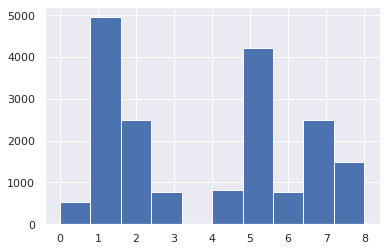

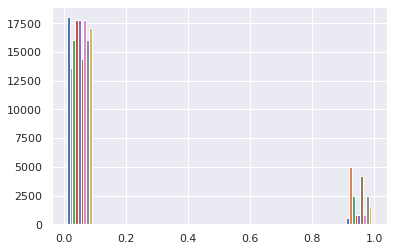

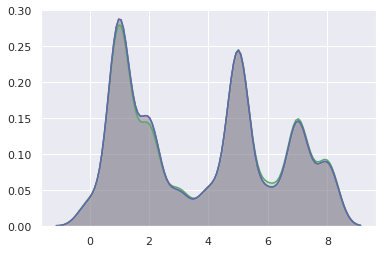

In [111]:
# This was separted since KNN's model needed an extra 'k' var
def runKNNClassifer(dataset, test_size, test=[]):
    # scale data
    X, y = dataset
    X = scaleData(X)[:,]    
    
    # get 
    xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(X, y, random_state=0, test_size=test_size)
    
    ks = [1]
    for k in ks:
    
        # fit and predict
        model = sklearn.neighbors.KNeighborsClassifier(n_neighbors= k, n_jobs=-1)
        model_mod = %time model.fit(xTrain,yTrain)
        yhat = %time model_mod.predict(xTest)
        predict_proba = %time model_mod.predict_proba(xTest)


        # Analysis
        score = accuracy_score(yTest, yhat);
        print('Accuracy Score:', np.round(score, 3));
        cm = confusion_matrix(yTest, yhat);
        print(cm)
        
        rp = classification_report(yTest, yhat)
        print(rp)
        yProb = getPredictProbaDistrib(predict_proba)

        # Graph
        plt.hist(yhat)
        plt.show()

        plt.hist(predict_proba)
        plt.show()
        
        sns.kdeplot(yTest, shade=True, color='g', Label = 'True y')
        sns.kdeplot(yhat, shade=True, color='r' ,Label = 'y hat')
        sns.kdeplot(yProb, shade=True, color='b', Label = 'y proba (max)')


        return score, cm, yhat, predict_proba
        
print("---------- KNN Training Model ----------")
print("-------------------------------------")
dataset = (xTrain, yTrain)
test_size = 0.3
knnResult = runKNNClassifer(dataset, test_size)


Note: Only the KNN will have all three graphs. The rest will just have the last KDE graph since it give us the most information.

---------- Training Models ----------
-------------------------------------

-------------------
Logistic Regression
-------------------
CPU times: user 1.03 s, sys: 1 µs, total: 1.03 s
Wall time: 1.03 s
CPU times: user 5.18 ms, sys: 5 µs, total: 5.19 ms
Wall time: 2.95 ms
CPU times: user 10.9 ms, sys: 12 µs, total: 10.9 ms
Wall time: 5.32 ms
Accuracy Score: 0.739
[[ 124   75    0    1    1   67    9  141  148]
 [   2 4316  413    4   36   12   22   16    7]
 [   0 1661  586    2   21    3   48    9    3]
 [   0  598   97   88    5   35    9    4    0]
 [   0   76    1    0  728    1    0    2    0]
 [  11   90    7    4    0 3914   52   96   62]
 [  12  202   66    4    2   83  423   81    6]
 [  24   74   10    0    3   79   18 2302   37]
 [  19  100    0    2    3   74   10   89 1234]]
              precision    recall  f1-score   support

           0       0.65      0.22      0.33       566
           1       0.60      0.89      0.72      4828
           2       0.50      0.25    

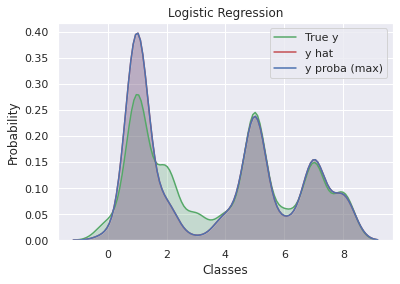


-------------------
Linear Discriminant Analysis
-------------------
CPU times: user 477 ms, sys: 0 ns, total: 477 ms
Wall time: 383 ms
CPU times: user 5.98 ms, sys: 0 ns, total: 5.98 ms
Wall time: 2.83 ms
CPU times: user 11 ms, sys: 4 µs, total: 11 ms
Wall time: 5.42 ms
Accuracy Score: 0.7
[[ 279  131    0    0    0   10    5   65   76]
 [  13 3954  782   19   28    2   22    7    1]
 [   2 1417  834   16   13    1   45    4    1]
 [   1  606  106   91    4   11   13    3    1]
 [   0  152    5    0  649    0    0    2    0]
 [  59  322   15    8    0 3628   57   90   57]
 [  39  281   63    4    0   29  419   43    1]
 [ 105  265   22    0    1   42   16 2064   32]
 [ 135  230    0    0    0   28    8   60 1070]]
              precision    recall  f1-score   support

           0       0.44      0.49      0.47       566
           1       0.54      0.82      0.65      4828
           2       0.46      0.36      0.40      2333
           3       0.66      0.11      0.19       836
   

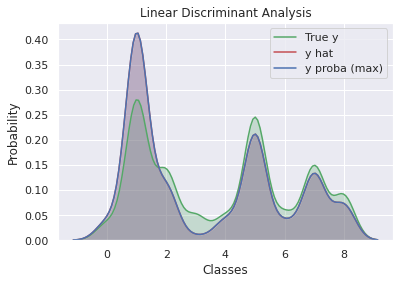


-------------------
Quadratic Discriminant Analysis
-------------------
CPU times: user 252 ms, sys: 19 µs, total: 252 ms
Wall time: 129 ms
CPU times: user 188 ms, sys: 0 ns, total: 188 ms
Wall time: 93.6 ms
CPU times: user 183 ms, sys: 4 ms, total: 187 ms
Wall time: 93.4 ms
Accuracy Score: 0.661
[[ 207   37    8   23   34   16   29   23  189]
 [  10 3428  559  391  291   13  100   11   25]
 [   1 1161  708  243  108    1   96    8    7]
 [   0  285   41  418   54    4   23    3    8]
 [   0   41    0    7  752    3    2    0    3]
 [ 114   73   42  165   27 3445  121   75  174]
 [  23  108   87   91   27   39  472   21   11]
 [ 323   26   43   11   24   86  167 1598  269]
 [  61   62   12   30   52   38   10   30 1236]]
              precision    recall  f1-score   support

           0       0.28      0.37      0.32       566
           1       0.66      0.71      0.68      4828
           2       0.47      0.30      0.37      2333
           3       0.30      0.50      0.38       8

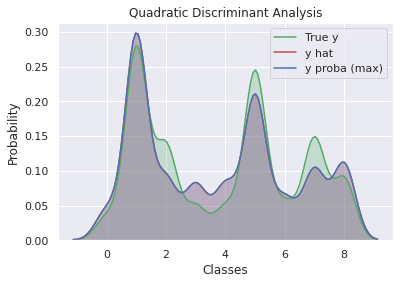


-------------------
Tree
-------------------
CPU times: user 1.05 s, sys: 2 µs, total: 1.05 s
Wall time: 1.04 s
CPU times: user 6.24 ms, sys: 0 ns, total: 6.24 ms
Wall time: 5.92 ms
CPU times: user 6.19 ms, sys: 4 µs, total: 6.19 ms
Wall time: 5.98 ms
Accuracy Score: 0.708
[[ 239   26   12    3    3   48   38   88  109]
 [  24 3336  967  247   18   45   98   50   43]
 [   9  903 1133  145    2   24   75   17   25]
 [   5  236  163  366    2   25   16    8   15]
 [   4   13    8    5  766    5    2    1    4]
 [  59   77   33   54    3 3750   76  112   72]
 [  53  110  100   33    7   94  401   59   22]
 [  97   41   33    9    8  130   90 2070   69]
 [ 131   45   18   18    6   72   42  109 1090]]
              precision    recall  f1-score   support

           0       0.38      0.42      0.40       566
           1       0.70      0.69      0.69      4828
           2       0.46      0.49      0.47      2333
           3       0.42      0.44      0.43       836
           4       0.

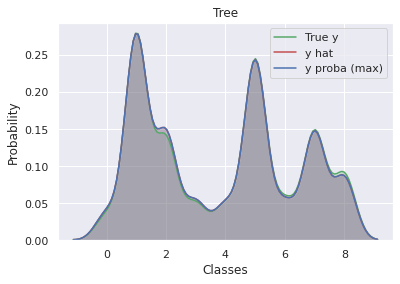


-------------------
Random Forest
-------------------
CPU times: user 7.39 s, sys: 102 µs, total: 7.39 s
Wall time: 7.39 s
CPU times: user 387 ms, sys: 0 ns, total: 387 ms
Wall time: 386 ms
CPU times: user 389 ms, sys: 0 ns, total: 389 ms
Wall time: 389 ms
Accuracy Score: 0.8
[[ 213   21    3    1    2   48   14  131  133]
 [   0 4257  496   24    6    9   23   11    2]
 [   0 1183 1077   30    0    3   24   12    4]
 [   0  326  117  350    5   24   10    2    2]
 [   2   20    1    0  783    2    0    0    0]
 [   9   59    3    4    0 3987   50   72   52]
 [  11  137   60   16    4   78  485   74   14]
 [  17   29    8    0    4   74   10 2377   28]
 [  25   35    1    0    3   63   11   71 1322]]
              precision    recall  f1-score   support

           0       0.77      0.38      0.51       566
           1       0.70      0.88      0.78      4828
           2       0.61      0.46      0.53      2333
           3       0.82      0.42      0.56       836
           4      

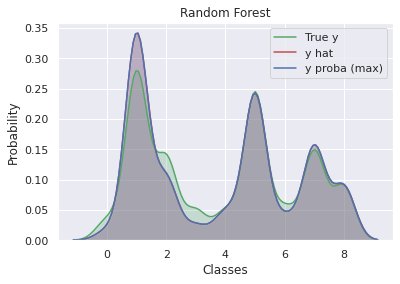

In [112]:
# https://scikit-learn.org/stable/modules/tnbree.html
# tre = sklearn.tree.DecisionTreeClassifier().fit(xTrain, yTrain)

print("---------- Training Models ----------")
print("-------------------------------------")
models = [sklearn.linear_model.LogisticRegression(multi_class='multinomial', penalty='l1', solver='saga', tol=0.1,max_iter=len(yTrain)), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(), sklearn.tree.DecisionTreeClassifier(), RandomForestClassifier()]
modelNames = ['Logistic Regression', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Tree', 'Random Forest']
dataset = (xTrain, yTrain)
test_size = 0.3

# get best accuracy score
results = runClassifers(models, modelNames, dataset, test_size);

In [119]:
# Change data into form that is required to submit for kaggle
y = []
for i in range(11):
    y.append(0)

testResults = []
i = 1
submits = {}

for result in results[0]:
#     print(result)
    index = np.argmax(result)
    yi = y.copy()
    yi[0] = i
    yi[index] = 1

    testResults.append(yi)
    submits[i] = yi
    
    i = i + 1

# Results and Analysis: 


- Best result (Please see the 'Models' section for each classification results):

---------- Best Test Model ---- ----------
-------------------------------------

-------------------
Random Forest
-------------------
CPU times: user 11.3 s, sys: 131 µs, total: 11.3 s
Wall time: 11.3 s
CPU times: user 3.24 s, sys: 50 µs, total: 3.24 s
Wall time: 3.24 s
CPU times: user 3.25 s, sys: 29 µs, total: 3.25 s
Wall time: 3.25 s


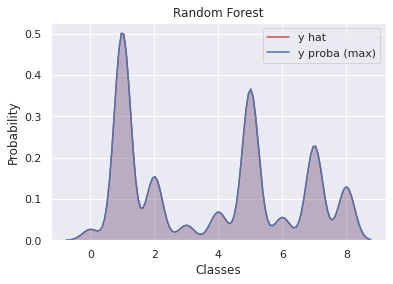

In [109]:
# Run model with best accurarcy score
print("---------- Best Test Model ---- ----------")
print("-------------------------------------")
# scores = results
bestModelIndex = np.argmax(results)
best = runClassifers([models[bestModelIndex]], [modelNames[bestModelIndex]], dataset, test_size, xTest)

In [108]:
print('Best model is:', modelNames[bestModelIndex])
print('Score of:', results[bestModelIndex])

Best model is: Random Forest
Score of: 0.8037060978237449


All in all, the highest accurrancy score was from the Random Forest classification. But of the ones that we mentioned in class, the KNN with 1 nearest neighbor came in second place.

The F1 score was also used to determine the best model because it mirrors the accurrency score very well. As you can see from the belove model reports, for each F1 score, the Random Forest is usually higher than the other models with KNN being the second to follow it. This seem plausible since F1 score is the harmonic mean of precision and recall. Since we are looking for precise and true outcome. That is why the two evaulations were use to measure which model should be use.

# Discussion and Conclusion: 10 pts 

__Background__
This notebook contains the data analysis for 'Otto Group Product Classification Challenge -
Classify products into the correct category'. The goal is to classify the test data set into 9 different major shopping department catergories. But the catergories are not known to us, it is simply stated as 'Class 1-9'. 

Since Otto is a worldwide company, there has been different classification for the same item. In order to refine this classification process between the different culture's interperations, it is vital to correctly classify the right classes. 

Therefore, there are 93 features that a product can belong to. Of those 93 features, each as a number associated with how many times that feature was associated with that event (class). 

__Discussion: Result__
While training the different models, the result was the first and second best model was with the Random Forest then the KNN model. I was surprised on how well the overlap of the tree model looked in the graph but it did not produce the highest accurancy score.
Since the KNN worked so well for k = 1 nearest neighbor, I would suggest to do k=2 near neighbor also. It just took a rather long time for even k = 1 so I did not do it this time. 

Therefore, Random Forest was used to submit to Kaggle to determine the catergory of each of the test data set that was provided. 

# Write-up: 5 pts

- Is the writeup organized and clear? (2 pts)
- Are the codes commented and organized? (2 pts)
- Did author use git? (1 pts)
